## SVD - redukcja wymiarów


In [ ]:
import numpy as np
from numpy.linalg import svd # służy do redukcji wymiarów

In [2]:
A=np.array([(2, 4), (1, 3), (0, 0), (0, 0)]) 
# jest to macierz o dwóch klumnach i 4 wierszach w1 = (2, 4), w2 = (1, 3), itd.



In [145]:
A.shape

2

In [4]:
A

array([[2, 4],
       [1, 3],
       [0, 0],
       [0, 0]])

In [5]:
U, s, V = svd(A, full_matrices=False) 

# podajemy jaką macierz chcemy zdekomponować: A
# i informację czy mamy do czynienia z macierza kwadratową - nasza nie jest więc false

In [6]:
print(U) # 
print(s) #
print(V) #

[[-0.81741556 -0.57604844]
 [-0.57604844  0.81741556]
 [ 0.          0.        ]
 [ 0.          0.        ]]
[5.4649857  0.36596619]
[[-0.40455358 -0.9145143 ]
 [-0.9145143   0.40455358]]


In [7]:
# !pip install --upgrade pip

Requirement already up-to-date: pip in /home/kodolamacz/anaconda3/lib/python3.7/site-packages (19.1)


In [8]:
# !pip install scikit.image

  Using cached https://files.pythonhosted.org/packages/2e/21/ea56c8bb2e8112837dd71aebeb2ac67913e784911c0d7f493a593fa1a207/scikit_image-0.15.0-cp37-cp37m-manylinux1_x86_64.whl


In [9]:
# !pip install scikit-image

In [12]:
from skimage import data

In [13]:
camera = data.camera()

In [184]:
import matplotlib.pyplot as plt

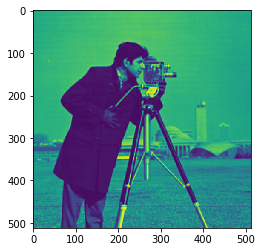

In [15]:
plt.imshow(camera)

In [17]:
camera
# dzięki svd taki obrazem możemy skompresować


array([[156, 157, 160, ..., 152, 152, 152],
       [156, 157, 159, ..., 152, 152, 152],
       [158, 157, 156, ..., 152, 152, 152],
       ...,
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111]], dtype=uint8)

In [19]:
original_shape=camera.shape
original_shape

(512, 512)

In [20]:
U, s, V = svd(camera, full_matrices=True)

In [36]:
#print(U) # 
#print(s) #
#print(V) #

In [22]:
print(U.shape) # 
print(s.shape) # wartości osobliwe macierzy A
print(V.shape) #

(512, 512)
(512,)
(512, 512)


In [27]:
np.diag([1, 1, 1, 1])

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])

In [28]:
camera_compress=np.dot(U[:,:1], np.dot(np.diag(s[:1]), V[:1, :]))

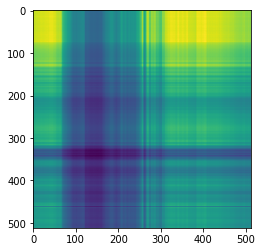

In [29]:
plt.imshow(camera_compress)

In [66]:
camera_compress=np.dot(U[:,10:512], np.dot(np.diag(s[10:512]), V[10:512, :]))
# z tego widać, że w pierwszych 10 wymiarach jest dużo więcej inf. o obrazie niż w pozostałych
# pierwsze 10 daje juz w miarę dobrą dokłądnośc

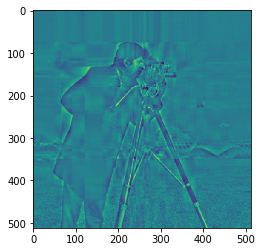

In [61]:
plt.imshow(camera_compress)

In [75]:
camera_compress=np.dot(U[:,:15], np.dot(np.diag(s[:15]), V[:15, :]))

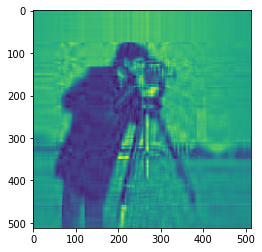

In [76]:
plt.imshow(camera_compress)

In [78]:
camera_compress=np.dot(U[:,:150], np.dot(np.diag(s[:150]), V[:150, :]))

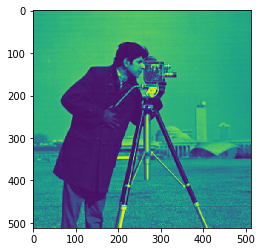

In [79]:
plt.imshow(camera_compress)

In [64]:
camera_compress=np.dot(U[:,0:512], np.dot(np.diag(s[0:512]), V[0:512, :]))
# pelny obraz

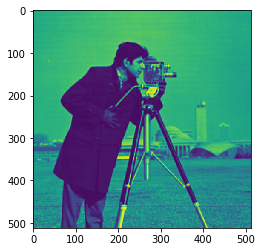

In [65]:
plt.imshow(camera_compress)

In [68]:
import imageio

In [80]:
imageio.imwrite('~/bootcamp/ML/Dane/camera.jpg', camera)
imageio.imwrite('~/bootcamp/ML/Dane/camera_compress.jpg', camera_compress)

In [81]:
from PIL import Image

In [100]:
img = Image.open("Dane/luk4.jpg")
imggray=img.convert('LA')

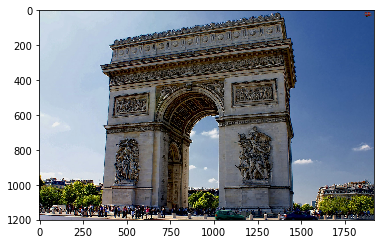

In [101]:
plt.imshow(img)

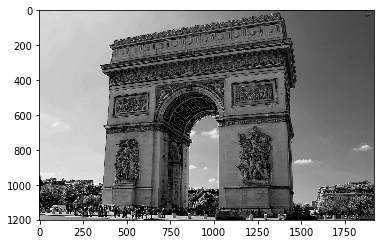

In [126]:
plt.imshow(imggray)

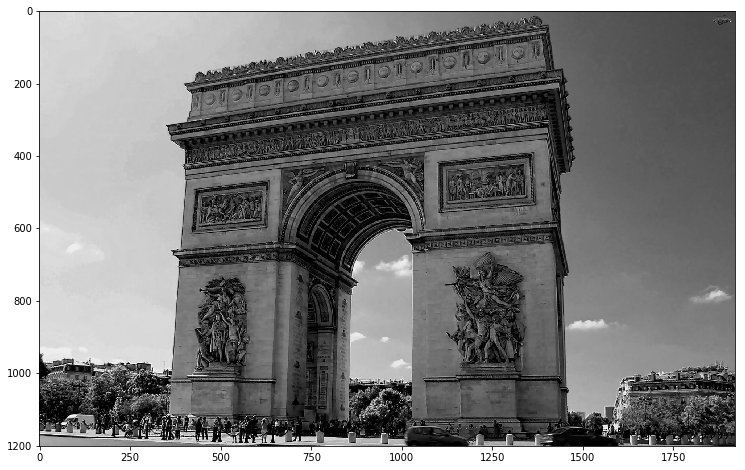

In [136]:
imgmat=np.array(list(imggray.getdata(band=0)), float)
imgmat.shape = (img.size[1], img.size[0])
imgmat = np.matrix(imgmat)
plt.figure(figsize=(15, 8))
plt.imshow(imgmat, cmap='gray')

In [128]:
imageio.imwrite('~/bootcamp/ML/Dane/luk4-imgmat.jpg', imgmat)

In [129]:
U, s, V = svd(imgmat, full_matrices=False)
imgreconst = np.dot(U[:, :1], np.dot(np.diag(s[:1]), V[:1,:]))

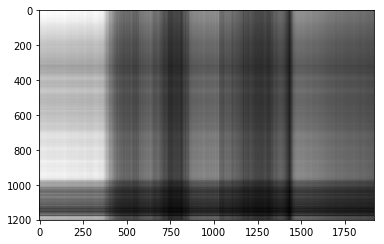

In [130]:
plt.imshow(imgreconst, cmap='gray')

In [137]:
imgreconst = np.dot(U[:, :30], np.dot(np.diag(s[:30]), V[:30,:]))

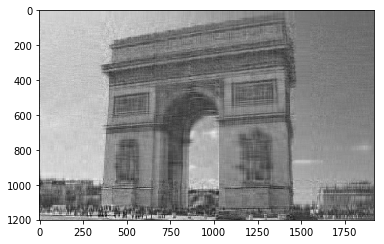

In [138]:
plt.imshow(imgreconst, cmap='gray')

In [133]:
imageio.imwrite('~/bootcamp/ML/Dane/imgmat30.jpg', imgreconst)

In [141]:
from skimage.color import rgb2gray
from skimage import img_as_float

In [143]:
images = {
    "camera": data.camera(),
    "coin": data.coins(),
    "astronaut": rgb2gray(img_as_float(data.astronaut())),
    "chelsea": rgb2gray(img_as_float(data.chelsea()))
}

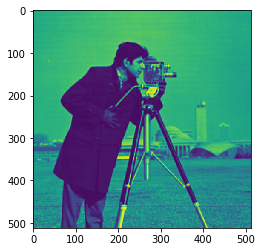

In [144]:
plt.imshow(images["camera"])

In [230]:
def zwroc_imgreconst_i_s(image, k):
    """
    podajemy obrazek liczbe k wektorów własnych macierzy czyli w sumie ile wymiarów zostawiamy po kompreskji
    """
    ksztalt=images[image].shape
    if k > ksztalt[1]:
        k = ksztalt[1]
    if ksztalt[0] == ksztalt[1]:
        kwadratowa = True
    else:
        kwadratowa = False
    U, s, V = svd(images[image], full_matrices=kwadratowa)
    imgreconst = np.dot(U[:, :k], np.dot(np.diag(s[:k]), V[:k,:]))
    
    return(imgreconst, s)
    
    

In [231]:
imgreconst1, s = zwroc_imgreconst_i_s("camera", 60)

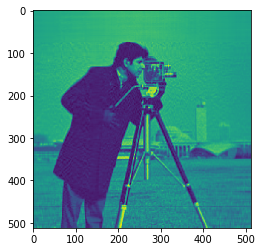

In [232]:
plt.imshow(imgreconst1)

In [262]:
def show_compress(image_name, k):
    """
    funkcja pokazuje 2 elementy
    1) obrazek (mshow)
    2) wyliczony compression ratio
    3) wykres s (plot(s))
    """
    original_shape=images[image_name].shape
    if k > original_shape[1]:
        k = original_shape[1]
    imgreconst, s = zwroc_imgreconst_i_s(image_name, k)
    compression_ratio = 100.0 * (k*(original_shape[0]+original_shape[1])+k) /(original_shape[0]*original_shape[1])
    print(f"kompresja = {compression_ratio:3.6}")
    fig, axes = plt.subplots(1, 2)
    axes[0].plot(s)
    axes[1].imshow(imgreconst, cmap='gray')

    return

kompresja = 200.195


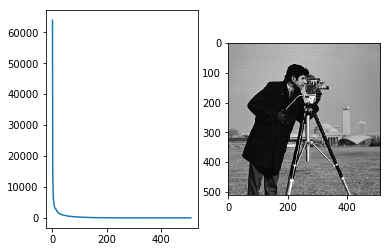

In [263]:
show_compress("camera", 512)

kompresja = 100.044


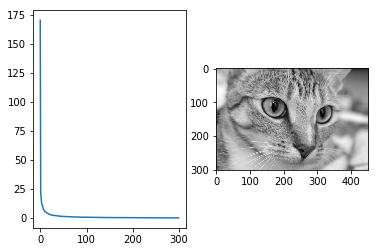

In [264]:
show_compress("chelsea", 180)

In [254]:
from ipywidgets import interact

In [265]:
interact(show_compress, image_name=list(images.keys()), k=(1, 300))

interactive(children=(Dropdown(description='image_name', options=('camera', 'coin', 'astronaut', 'chelsea'), v…

<function __main__.show_compress(image_name, k)>

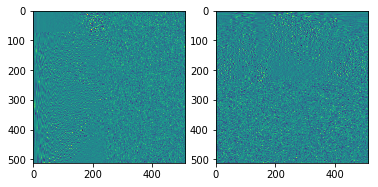

In [256]:
U, s, V = svd(camera)
fig, axes = plt.subplots(1, 2)
axes[0].imshow(U)
axes[1].imshow(V)

In [257]:
#s

In [259]:
# przykład rozwiązania od prowadzącego
def show_compress(image_name,k):
   image=images[image_name]
   original_shape = image.shape
   reconst_image,s = svd_compress(image,k)
   fig,axes = plt.subplots(1,2)
   axes[0].plot(s)
   compression_ratio =100.0* (k*(original_shape[0] + original_shape[1])+k)/(original_shape[0]*original_shape[1])
   axes[1].set_title("kompresja={:.2f}".format(compression_ratio)+"%")
   axes[1].imshow(reconst_image,cmap='gray')
   axes[1].axis('off')
   fig.tight_layout()
    
# https://pl.wikipedia.org/wiki/%C5%81uk_triumfalny#/media/File:Paris_July_2011-30.jpg

## KONIEC svd

## PCA - analiza głównych składowych (jedna z metod analizy czynnikowej)
## zbiór o N wymiarach i k zmiennych

In [272]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'Class']
iris_data=pd.read_csv(url, names = names)

In [273]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
Class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [274]:
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [275]:
X = iris_data.drop('Class', 1)
y = iris_data['Class']

In [279]:
from sklearn.model_selection import train_test_split

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [281]:
#do standaryzacji zmiennych
from sklearn.preprocessing import StandardScaler

In [282]:
# przeprowadzamy standaryzację zmeinnych!!!
# w praktyce konieczne!!!
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [283]:
from sklearn.decomposition import PCA # principal component analysis


In [284]:
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [293]:
#X_train

In [294]:
#X_test

In [287]:
explained_variance = pca.explained_variance_ratio_

array([0.74548283, 0.22942648, 0.01707989, 0.0080108 ])

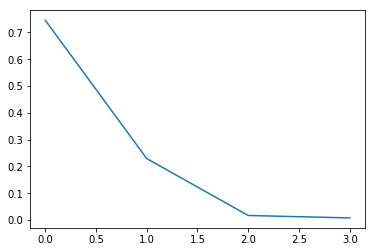

In [290]:
plt.plot(explained_variance)
explained_variance

In [291]:
eigenvalues = pca.explained_variance_

In [292]:
eigenvalues # wartości własne macierzy po standaryzacji
# biezęmy tyle składowych dopói wartości własne składowej są większe niż 1

array([3.08475653, 0.94935095, 0.07067541, 0.03314814])

In [308]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
pca = PCA(n_components = 1)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [297]:
#X_train

In [309]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth = 2, n_estimators = 100, random_state = 1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy '+str(accuracy_score(y_test, y_pred)))

Accuracy 0.9333333333333333


In [301]:
loading_scores = pca.components_[0]
loading_scores

array([ 0.49442551, -0.32278312,  0.57195253,  0.56940739])

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

In [313]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth = 2, n_estimators = 100, random_state = 1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy '+str(accuracy_score(y_test, y_pred)))

Accuracy 0.8666666666666667


In [306]:
# model bez redukcji wymiarów - daje wynik podobny do tego z tylko jednym wymiarem
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth = 2, n_estimators = 100, random_state = 1)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import accuracy_score
print('Accuracy '+str(accuracy_score(y_test, y_pred)))

Accuracy 0.9333333333333333


In [314]:
# wyznaczenie ładunków zmiennych dla wszystkich 4 składowych
loading_scores1 = pca.components_[0]
loading_scores2 = pca.components_[1]
loading_scores3 = pca.components_[2]
loading_scores4 = pca.components_[3]

print(loading_scores1)
print(loading_scores2)
print(loading_scores3)
print(loading_scores4)


[ 0.49442551 -0.32278312  0.57195253  0.56940739]
[0.5090938  0.86010527 0.02040921 0.02501795]
[-0.69046102  0.38633981  0.26729877  0.55005135]
[ 0.14010888 -0.08228931 -0.77524521  0.61040383]


In [316]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
names =  ['Class', 'Alcohol', 'MalicAcid', 'Ash', 'AlcalinityOfAsh', 'Magnesium', 'TotalPhenols',
        'Flavanoids', 'NonflavanoidPhenols', 'Proanthocyanins', 'ColorIntensity',
        'Hue', 'OD280/OD315', 'Proline']

In [319]:
data = pd.read_csv(url, names = names)
y = data['Class']
X = data.loc[:, 'Alcohol':]

In [321]:
#data

In [322]:
y.unique()

array([1, 2, 3])

Text(0,0.5,'ColorIntensity')

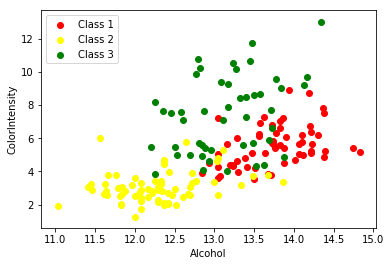

In [328]:
plt.scatter(X[y==1]['Alcohol'], X[y==1] ['ColorIntensity'], label = 'Class 1', c = 'red')
plt.scatter(X[y==2]['Alcohol'], X[y==2] ['ColorIntensity'], label = 'Class 2', c = 'yellow')
plt.scatter(X[y==3]['Alcohol'], X[y==3] ['ColorIntensity'], label = 'Class 3', c = 'green')
plt.legend()
plt.xlabel('Alcohol')
plt.ylabel('ColorIntensity')             

In [334]:
sc = StandardScaler()
X = sc.fit_transform(X)
pca = PCA(n_components = 2)
X = pd.DataFrame(pca.fit_transform(X))


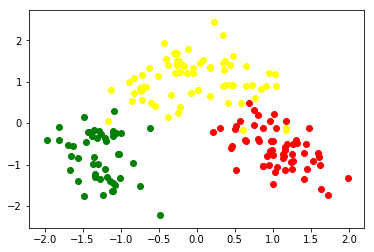

In [336]:
plt.scatter(X[y==1][0], X[y==1][1], label = 'Class 1', c = 'red')
plt.scatter(X[y==2][0], X[y==2][1], label = 'Class 2', c = 'yellow')
plt.scatter(X[y==3][0], X[y==3][1], label = 'Class 3', c = 'green')

In [357]:
url = 'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Hitters.csv'

In [345]:
from sklearn.preprocessing import scale
import pandas as pd
from io import StringIO
import numpy as np

In [358]:
# DO zrobienia:
# pobrać dane
# usuń wiersze z pustymi wartościami (nie zamieniamy niczego tylko usuwamy!)
# zamienić dane tekstowe na dummies 0-1
# PCA jako redukcja wymiarów i wybrany model regresja
# PCA z interpretacją ładunków
# PCA z wykresem 2d z podziałem na dwie klasy wg mediany


In [359]:
data = pd.read_csv(url)

In [362]:
#data

In [393]:
data = pd.read_csv("Dane/Hitters.csv")

In [361]:
#data

In [394]:
data.shape

(322, 21)

In [395]:
dt2 = data.dropna()

In [396]:
dt2.shape

(263, 21)

In [399]:
dt2 = dt2.drop('Unnamed: 0', axis = 1)

In [400]:
dt2.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [401]:
dt2['League'] = dt2.League.map({'N':0, 'A': 1})


In [402]:
dt2['Division'] = dt2.Division.map({'E':0, 'W': 1})
dt2['NewLeague'] = dt2.NewLeague.map({'N':0, 'A': 1})

In [407]:
dt2.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,0,1,632,43,10,475.0,0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,1,1,880,82,14,480.0,1
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,0,0,200,11,3,500.0,0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,0,0,805,40,4,91.5,0
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,1,1,282,421,25,750.0,1


In [ ]:
# PCA jako redukcja wymiarów i wybrany model regresja
# PCA z interpretacją ładunków
# PCA z wykresem 2d z podziałem na dwie klasy wg mediany

In [411]:
X = dt2.drop(['Salary', 'Division', 'League', 'NewLeague'], axis = 1).astype('float64')
y = dt2.Salary

In [ ]:
##reszta podobnie tylko trzeba wybrac model do regresji!!!

In [432]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
pca = PCA(n_components = 5)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
from sklearn.ensemble import RandomForestRegressor
rtf = RandomForestRegressor(random_state = 1)
rtf.fit(X_train, y_train)
y_pred = rtf.predict(X_test)
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, y_pred)
print('mean_squared_error = ', mse)

mean_squared_error =  85408.2617788751


/home/kodolamacz/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
